In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!apt-get install -y graphviz libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 16 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:

In [ ]:
!pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.8/120.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.11-cp310-cp310-linux_x86_64.whl size=175927 sha256=e66dfd4e0d4568cd2c98bcc566c903935a1e1bc19a588552cb9d84f5f85b9331
  Stored in directory: /root/.cache/pip/wheels/5b/ee/36/f47a0d35664fbe1a2b5a433ae33c6ad636b00bb231f68a9aaa
Successfully built pygraphviz


In [ ]:
import numpy as np
import pandas as pd

# Number of samples
num_samples = 1000

# Generate random binary answers for four questions
breathing = np.random.randint(2, size=num_samples)
breathing_rate = np.random.randint(2, size=num_samples)
circulation = np.random.randint(2, size=num_samples)
mental_status = np.random.randint(2, size=num_samples)

# Create a DataFrame with the generated data
df = pd.DataFrame({
    'Breathing': breathing,
    'BreathingRateLessThan30': breathing_rate,
    'HealthyCirculation': circulation,
    'GoodMentalStatus': mental_status
})

# Function to apply the decision tree logic and generate labels
def generate_labels(row):
    if row['Breathing'] == 0:
        return 'Deceased'
    elif row['BreathingRateLessThan30'] == 0:
        return 'Immediate'
    elif row['HealthyCirculation'] == 0:
        return 'Immediate'
    elif row['GoodMentalStatus'] == 0:
        return 'Immediate'
    else:
        return 'Delayed'

# Apply the decision tree logic to generate labels
df['Label'] = df.apply(generate_labels, axis=1)

# One-hot encode the labels
df = pd.get_dummies(df, columns=['Label'], prefix='Class')

# Specify the path in Google Drive
file_path = '/content/gdrive/My Drive/medical_dataset.csv'

# Save the dataset to a CSV file in Google Drive
df.to_csv(file_path, index=False)

# Download the file to the local system
from google.colab import files
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving medical_dataset.csv to medical_dataset (1).csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset (replace 'path/to/your/dataset.csv' with the actual path)
df = pd.read_csv('medical_dataset.csv')

# Extract features and labels
X = df[['Breathing', 'BreathingRateLessThan30', 'HealthyCirculation', 'GoodMentalStatus']]
y = df[['Class_Deceased', 'Class_Immediate', 'Class_Delayed']]

# Set the feature names directly
X.columns = ['Breathing', 'BreathingRateLessThan30', 'HealthyCirculation', 'GoodMentalStatus']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the categories and probabilities for a sequence of 0s and 1s
def predict_category(sequence):
    # Ensure the input sequence has the correct length (4 in this case)
    if len(sequence) != 4:
        return "Invalid sequence length. It should be 4."

    # Convert the sequence to a NumPy array
    sequence_array = np.array(sequence).reshape(1, -1)

    # Make the prediction
    prediction_proba = model.predict_proba(sequence_array)
    prediction = model.predict(sequence_array)

    # Convert the prediction to a human-readable category
    if prediction[0][0] == 1:
        category = "Deceased"
    elif prediction[0][1] == 1:
        category = "Immediate"
    elif prediction[0][2] == 1:
        category = "Delayed"
    else:
        category = "Unknown category."

    return category, prediction_proba[0]

# Test the function with a sequence (replace [1, 0, 1, 1] with your own sequence)
sequence_to_test = [1 , 1 , 1 , 1]
predicted_category, predicted_proba = predict_category(sequence_to_test)

# Display the result
print(f"The predicted category for the sequence {sequence_to_test} is: {predicted_category}")
print(f"The predicted probabilities for each class are: {predicted_proba}")

# Optionally, you can evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")


The predicted category for the sequence [1, 1, 1, 1] is: Delayed
The predicted probabilities for each class are: [[1. 0.]]
Accuracy on the test set: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
!pip install pygraphviz

In [ ]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import graphviz

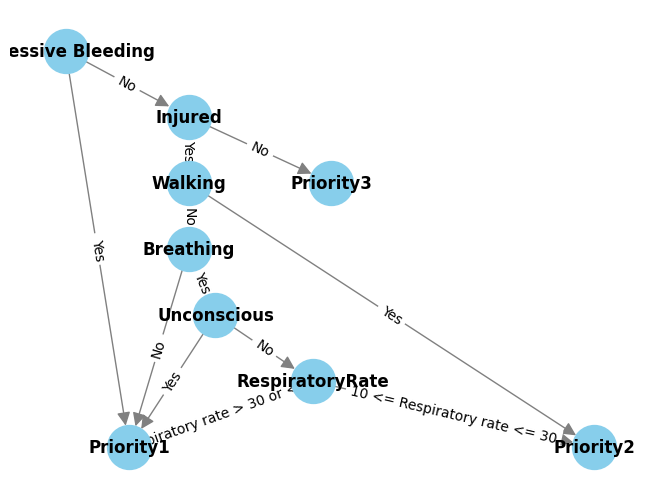

In [ ]:
# Create a directed graph

G = nx.DiGraph()

# Adding nodes and edges to represent the flow diagram
G.add_node("Excessive Bleeding", question="Is there excessive bleeding?")
G.add_node("Priority1", priority=1)
G.add_node("Priority2", priority=2)
G.add_node("Priority3", priority=3)
G.add_node("Injured", question="Are they injured?")
G.add_node("Walking", question="Can they walk?")
G.add_node("Breathing", question="Are they breathing?")
G.add_node("Unconscious", question="Are they unconscious?")
G.add_node("RespiratoryRate", question="What is the respiratory rate?")

G.add_edge("Excessive Bleeding", "Priority1", label="Yes")
G.add_edge("Excessive Bleeding", "Injured", label="No")

G.add_edge("Injured", "Walking", label="Yes")
G.add_edge("Injured", "Priority3", label="No")  # Updated to connect Injured to Escort when the answer is "No"

G.add_edge("Walking", "Priority2", label="Yes")
G.add_edge("Walking", "Breathing", label="No")

G.add_edge("Breathing", "Priority1", label="No")
G.add_edge("Breathing", "Unconscious", label="Yes")

G.add_edge("Unconscious", "Priority1", label="Yes")
G.add_edge("Unconscious", "RespiratoryRate", label="No")

G.add_edge("RespiratoryRate", "Priority1", condition=lambda rate: rate > 30 or rate < 10, label="Respiratory rate > 30 or < 10")
G.add_edge("RespiratoryRate", "Priority2", condition=lambda rate: 10 <= rate <= 30, label="10 <= Respiratory rate <= 30")

# Use Graphviz for layout
pos = graphviz_layout(G, prog='dot')

# Draw the graph with labels
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1000, edge_color='gray', linewidths=1, arrowsize=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


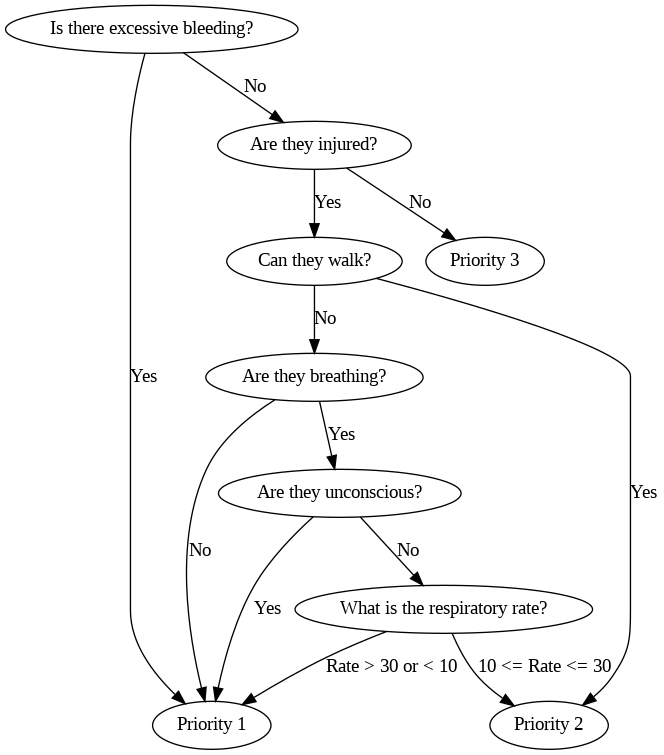

In [ ]:

# Create a Digraph object from graphviz
flowchart = graphviz.Digraph('flowchart')

# Adding nodes and edges to represent the flow diagram
flowchart.node('Excessive Bleeding', label='Is there excessive bleeding?')
flowchart.node('Priority1', label='Priority 1')
flowchart.node('Priority2', label='Priority 2')
flowchart.node('Priority3', label='Priority 3')
flowchart.node('Injured', label='Are they injured?')
flowchart.node('Walking', label='Can they walk?')
flowchart.node('Breathing', label='Are they breathing?')
flowchart.node('Unconscious', label='Are they unconscious?')
flowchart.node('RespiratoryRate', label='What is the respiratory rate?')


flowchart.edge('Excessive Bleeding', 'Priority1', label='Yes')
flowchart.edge('Excessive Bleeding', 'Injured', label='No')

flowchart.edge('Injured', 'Walking', label='Yes')
flowchart.edge('Injured', 'Priority3', label='No')

flowchart.edge('Walking', 'Priority2', label='Yes')
flowchart.edge('Walking', 'Breathing', label='No')

flowchart.edge('Breathing', 'Priority1', label='No')
flowchart.edge('Breathing', 'Unconscious', label='Yes')

flowchart.edge('Unconscious', 'Priority1', label='Yes')
flowchart.edge('Unconscious', 'RespiratoryRate', label='No')

flowchart.edge('RespiratoryRate', 'Priority1', label='Rate > 30 or < 10')
flowchart.edge('RespiratoryRate', 'Priority2', label='10 <= Rate <= 30')

flowchart.render('flowchart', format='png', cleanup=True)

# Display the flowchart image
from IPython.display import Image
Image(filename='flowchart.png')

In [ ]:

def traverse_flowchart(graph, start_node , ques):
    sequences = []
    questions = ques
    ques_m = []
    for q in (questions) :
        iterator = 0
        while (iterator <= len(q) - 1) :
            if q[iterator] == 0 :
                q[iterator] =  'No'
            elif q[iterator] == 1 :
                q[iterator] = 'Yes'
            iterator = iterator + 1
        ques_m.append(q)
    questions = ques_m
    for q in (questions) :
        sequence = []
        iterator = 0
        current_node = start_node
        while True:
            #print(f"Question: {graph.nodes[current_node]['question']}")

            answer = q [iterator]
            '''
            if 'condition' in graph[current_node][next(iter(graph.successors(current_node)))].keys():
                # If the edge has a condition, expect a numeric input
                try:
                    answer = float(input("Enter a numeric value: "))
                except ValueError:
                    print("Invalid input. Please enter a numeric value.")
                    continue
            else:
                # Otherwise, expect a yes/no answer
                answer = input("Enter 'Yes' or 'No': ").capitalize()
            '''
            next_nodes = list(graph.successors(current_node))

            if type(answer) == str :

                if answer == 'Yes' or (isinstance(answer, (int, float)) and answer > 0):
                    edge_label = 'Yes'
                elif answer == 'No':
                    edge_label = 'No'
                else:
                    print("Invalid input. Please enter 'Yes' or 'No'.")
                    continue

                for next_node in next_nodes:
                    edge_labels = graph[current_node][next_node]['label']
                    if edge_label in edge_labels:
                        sequence.append(answer)
                        current_node = next_node
                        break

            else :
                found_valid_edge = False
                for next_node in next_nodes:
                    edge_data = graph[current_node][next_node]
                    if edge_data['condition'](answer):
                        sequence.append(answer)
                        current_node = next_node
                        found_valid_edge = True
                        break
                if found_valid_edge == False :
                    print("Please enter a valid numeric value")
                    continue

            if 'priority' in graph.nodes[current_node]:
                sequence.append(graph.nodes[current_node]['priority'])
                break
            iterator = iterator + 1
        sequences.append(sequence)
    return sequences

# Start the traversal from the 'Excessive Bleeding' node
ques = [[0 , 1 ,0 , 1 , 0 , 31] , [0 , 1 , 1] , [0 , 1 , 0 , 0], [0 , 1 , 0 , 1 , 0  , 15] ]
sequences = traverse_flowchart(G, 'Excessive Bleeding', ques)
print(f"sequences: {sequences}")

sequences: [['No', 'Yes', 'No', 'Yes', 'No', 31, 1], ['No', 'Yes', 'Yes', 2], ['No', 'Yes', 'No', 'No', 1], ['No', 'Yes', 'No', 'Yes', 'No', 15, 2]]


In [ ]:
import os
dataset_dir  = '/content/gdrive/MyDrive/flowchart_dataset'

os.makedirs(dataset_dir, exist_ok=True)
# Create a Digraph object from graphviz
flowchart = graphviz.Digraph('flowchart')

# Adding nodes and edges to represent the flow diagram
name = 0
for seq in (sequences) :
    flowchart = graphviz.Digraph('flowchart')
    flowchart.node('Excessive Bleeding', label='Is there excessive bleeding?')
    flowchart.node('Priority1', label='Priority 1')
    flowchart.node('Priority2', label='Priority 2')
    flowchart.node('Priority3', label='Priority 3')
    flowchart.node('Injured', label='Are they injured?')
    flowchart.node('Walking', label='Can they walk?')
    flowchart.node('Breathing', label='Are they breathing?')
    flowchart.node('Unconscious', label='Are they unconscious?')
    flowchart.node('RespiratoryRate', label='What is the respiratory rate?')
    iterator = 0
    name = str(name)
    flowchart_name = name
    name = int(name)
    while (iterator <= len(seq) - 2) :
        value = seq[iterator]
        #print (value)
        if(iterator == 0) :
            if value == 'Yes' :
                flowchart.edge('Excessive Bleeding', 'Priority1', label='Yes', color='red')
                flowchart.edge('Excessive Bleeding', 'Injured', label='No')
            elif value == 'No' :
                flowchart.edge('Excessive Bleeding', 'Priority1', label='Yes')
                flowchart.edge('Excessive Bleeding', 'Injured', label='No', color='red')
        if(iterator == 1) :
            if value == 'Yes' :
                flowchart.edge('Injured', 'Walking', label='Yes', color='red')
                flowchart.edge('Injured', 'Priority3', label='No')
            if value == 'No' :
                flowchart.edge('Injured', 'Walking', label='Yes')
                flowchart.edge('Injured', 'Priority3', label='N0', color = 'red')
        if(iterator == 2) :
            if value == 'Yes' :
                flowchart.edge('Walking', 'Priority2', label='Yes', color='red')
                flowchart.edge('Walking', 'Breathing', label='No')
            if value == 'No' :
                flowchart.edge('Walking', 'Priority2', label='Yes')
                flowchart.edge('Walking', 'Breathing', label='No' , color = 'red')
        if(iterator == 3) :
            if value == 'Yes' :
                flowchart.edge('Breathing', 'Priority1', label='No')
                flowchart.edge('Breathing', 'Unconscious', label='Yes', color='red')
            if value == 'No' :
                flowchart.edge('Breathing', 'Priority1', label='No', color='red')
                flowchart.edge('Breathing', 'Unconscious', label='Yes')
        if(iterator == 4)  :
            if value == 'Yes' :
                flowchart.edge('Unconscious', 'Priority1', label='YES', color='red')
                flowchart.edge('Unconscious', 'RespiratoryRate', label='No')
            if value == 'No' :
                flowchart.edge('Unconscious', 'Priority1', label='Yes')
                flowchart.edge('Unconscious', 'RespiratoryRate', label='No', color = 'red')
        if(iterator == 5):
            #print('here')
            if  10 <= value <= 30 :
                flowchart.edge('RespiratoryRate', 'Priority1', label='Rate > 30 or < 10')
                flowchart.edge('RespiratoryRate', 'Priority2', label='10 <= Rate <= 30', color='red')
            if value > 30 or value < 10 :
                 flowchart.edge('RespiratoryRate', 'Priority1', label='Rate > 30 or < 10', color = 'red')
                 flowchart.edge('RespiratoryRate', 'Priority2', label='10 <= Rate <= 30')
        iterator = iterator +  1
    if (iterator == 1) :
        flowchart.edge('Injured', 'Walking', label='Yes')
        flowchart.edge('Injured', 'Priority3', label='No')

        flowchart.edge('Walking', 'Priority2', label='Yes')
        flowchart.edge('Walking', 'Breathing', label='No')

        flowchart.edge('Breathing', 'Priority1', label='No')
        flowchart.edge('Breathing', 'Unconscious', label='Yes')

        flowchart.edge('Unconscious', 'Priority1', label='Yes')
        flowchart.edge('Unconscious', 'RespiratoryRate', label='No')

        flowchart.edge('RespiratoryRate', 'Priority1', label='Rate > 30 or < 10')
        flowchart.edge('RespiratoryRate', 'Priority2', label='10 <= Rate <= 30')
    if (iterator == 2) :
        flowchart.edge('Walking', 'Priority2', label='Yes')
        flowchart.edge('Walking', 'Breathing', label='No')

        flowchart.edge('Breathing', 'Priority1', label='No')
        flowchart.edge('Breathing', 'Unconscious', label='Yes')

        flowchart.edge('Unconscious', 'Priority1', label='Yes')
        flowchart.edge('Unconscious', 'RespiratoryRate', label='No')

        flowchart.edge('RespiratoryRate', 'Priority1', label='Rate > 30 or < 10')
        flowchart.edge('RespiratoryRate', 'Priority2', label='10 <= Rate <= 30')
    if(iterator == 3) :
        flowchart.edge('Breathing', 'Priority1', label='No')
        flowchart.edge('Breathing', 'Unconscious', label='Yes')

        flowchart.edge('Unconscious', 'Priority1', label='Yes')
        flowchart.edge('Unconscious', 'RespiratoryRate', label='No')

        flowchart.edge('RespiratoryRate', 'Priority1', label='Rate > 30 or < 10')
        flowchart.edge('RespiratoryRate', 'Priority2', label='10 <= Rate <= 30')
    if(iterator == 4) :
        flowchart.edge('Unconscious', 'Priority1', label='Yes')
        flowchart.edge('Unconscious', 'RespiratoryRate', label='No')

        flowchart.edge('RespiratoryRate', 'Priority1', label='Rate > 30 or < 10')
        flowchart.edge('RespiratoryRate', 'Priority2', label='10 <= Rate <= 30')
    flowchart_filename = os.path.join(dataset_dir , flowchart_name)
    flowchart.render(flowchart_filename , format = 'png' , cleanup = True)
    name = name + 1




In [ ]:
import pandas as pd
labels = [
    "Is there excessive bleeding?",
    "Are they Injured?",
    "Can they walk?",
    "Are they breathing?",
    "Are they unconscious?",
    "What is the respiratory rate?",
    "Priority"
]
datalist = []
for sequence in sequences :
    dataset = {}
    for l in range (len(sequence)) :
        element = sequence[l]
        label = labels[l]
        if l == len(sequence) - 1 :
            c = l
            if c < len(labels) - 1 :
                while (c <= len(labels) - 1) :
                    dataset[labels[c]] = None
                    c = c + 1
            dataset['Priority'] = sequence[l]

        else :
            dataset[label] = str(element)

    datalist.append(dataset)
df = pd.DataFrame(datalist)
print(df.to_string(index=False))

Is there excessive bleeding? Are they Injured? Can they walk? Are they breathing? Are they unconscious? What is the respiratory rate?  Priority
                          No               Yes             No                 Yes                    No                            31         1
                          No               Yes            Yes                None                  None                          None         2
                          No               Yes             No                  No                  None                          None         1
                          No               Yes             No                 Yes                    No                            15         2
